# Woman's Health and Wearable Analytics
## by Karin Wiberg

## Background

The Oura ring is a consumer wearable which measures nighttime health data, as the resting state gives a good indication of the overall health of a person. The measures include 3 of the 4 until recently accepted vital signs: 
- Body temperature
- Pulse rate
- Resiration rate

Moreover, from 2015 the American College of Obstetrics and Gynecology (ACOG) and American Academy of Pediatrics (AAP) [advises](https://www.acog.org/clinical/clinical-guidance/committee-opinion/articles/2015/12/menstruation-in-girls-and-adolescents-using-the-menstrual-cycle-as-a-vital-sign) health practitioners to consider the menstrual cycle as the 5th vital sign. Period health are as important health indicators as body temperature, pulse, breathing and blood preassure. These directives are guiding all doctors, not only gynecologists, to focus on periods in female health assessments.

The Oura ring can also be used to [understand](https://blog.ouraring.com/your-menstrual-cycle/) how the menstrual cycle affects the whole body. Hence, tracking the menstrual cycle in woman is key to optimize health and performance.

To be a consumer wearable, the Oura ring has in [validation](https://blog.ouraring.com/how-accurate-is-oura/) studies shown to be quite accurate  for _resting heart rate_, _heart rate variability_ and _[respiratory rate](https://blog.ouraring.com/how-accurate-is-ouras-respiratory-rate/)_ making it a good option for cunsumer at home health monitoring. It is not though classified as a medical device, meaning that there are potentially have accuracy issues with the data. 



## Preliminary Wrangling
The data set is about 3 years health data from the [Oura ring](https://ouraring.com) from a client of mine used anonymously with permission.

### Data Set Variables

The data set contains following variables of interest:
- **[Resting Heart Rate (RHR, bpm)](https://blog.ouraring.com/respiratory-rate/)**: Speed of the heart rate during rest in beats per minute (bpm), a well known vital sign used to estimate current and future health health.
- **[Respiratory Rate (breaths/min)](https://blog.ouraring.com/respiratory-rate/)**: Number of breaths per minute, generated from heart beat data and typical healthy range is 12-20 breaths per minute. EArly indicator of low levels of oxygens in the cells, high levels of carbondiaxode in the bloodstream and metabolic and respiratory acidosis.
- **[Average Heart Rate Variability (HRV, ms)](https://blog.ouraring.com/what-is-heart-rate-variability/)**: The varaition in the time interval between consecutive heartbeats in milliseconds (ms). HRV is an indicator for stress levels, recovery status and wellbeing.  
- **[Deep Sleep Time (s)](https://blog.ouraring.com/sleep-score/)**: Non-REM sleep stage, key sleep stage for restoration and rejuvenation.
- **[Relative Body Temperature (rel degree C)](https://blog.ouraring.com/your-body-temperature-and-oura/)**: Measures skin temperature differences between the night and the long term average, indicating illness and hormonal shifts in the menstrual cycle.
- **[Steps (nr of steps)](https://blog.ouraring.com/activity-score/)**: Number of steps taken daily, indicator of activity.
- **[Activity Score](https://blog.ouraring.com/activity-score/)**: A measure generated by Oura to compare activity and rest (> 85: Optimal balance between activity and rest, 84-70: Good balance between activity and rest, < 70: Pay attention to balance between acitivity and rest).
- **[Readiness Score](https://blog.ouraring.com/readiness-score/)**: Overall measure generated by Oura from previous night's sleep, sleep balance, previous days activity, acitivity balance, recovery index, body temperature, resting heart rate, HRV balance indicating the capacity to peak performance (mentally, emotionally and physically).
- **[Recovery Index](https://blog.ouraring.com/readiness-score/)**: Indicator of the time it takes for the heart rate to stabilize during the night, for good health this should be in the first part of the night.
- **[Cycle Phase](https://blog.ouraring.com/your-body-temperature-and-oura/)**: Phase in the menstrual cycle, generated manually from period tracking and trends in relative body temperature (optimally collected from period tracking apps).
- **Season**: Extracted from date column to track seasonal changes. Winter: Dec-Feb, Spring: Mar-May, Summer: Jun-Aug, Autumn: Sep-Nov.
- **Year**: Extracted from date column to track yearly progress.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

# load data
health_data = pd.read_csv('health-data-ver2.csv', sep = ';')
health_data.head()

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,...,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2017-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-07,86.0,100.0,100.0,49.0,83.0,83.0,88.0,66.0,38340.0,...,0.0,92.0,82.0,100.0,0.0,99.0,100.0,88.0,NaN,100.0
2,2017-10-08,89.0,100.0,100.0,32.0,100.0,84.0,96.0,81.0,40380.0,...,0.0,92.0,89.0,99.0,94.0,77.0,100.0,90.0,NaN,100.0
3,2017-10-09,79.0,77.0,97.0,26.0,95.0,75.0,91.0,100.0,29460.0,...,0.0,75.0,70.0,89.0,85.0,85.0,91.0,88.0,NaN,1.0
4,2017-10-10,88.0,87.0,100.0,40.0,98.0,92.0,98.0,100.0,31080.0,...,1.0,91.0,89.0,86.0,89.0,83.0,100.0,100.0,NaN,100.0


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         1109 non-null   object 
 1   Sleep Score                  1040 non-null   float64
 2   Total Sleep Score            1040 non-null   float64
 3   REM Sleep Score              1040 non-null   float64
 4   Deep Sleep Score             1040 non-null   float64
 5   Sleep Efficiency Score       1040 non-null   float64
 6   Restfulness Score            1040 non-null   float64
 7   Sleep Latency Score          1040 non-null   float64
 8   Sleep Timing Score           1040 non-null   float64
 9   Total Bedtime                1040 non-null   float64
 10  Total Sleep Time             1040 non-null   float64
 11  Awake Time                   1040 non-null   float64
 12  REM Sleep Time               1040 non-null   float64
 13  Light Sleep Time  

In [3]:
# copy df for clean data
health_data_clean = health_data.copy()

In [4]:
# basic cleaning of data

# remove nulls
health_data_clean = health_data_clean[health_data_clean['Deep Sleep Time'].notnull()]
health_data_clean = health_data_clean[health_data_clean['Steps'].notnull()]

# remove invalid data 12 oct 2020
health_data_clean = health_data_clean[health_data_clean['date'] != '2020-10-12']

# remove irrelevant factors
health_data_clean = health_data_clean[['date', 'Readiness Score', 'Average Resting Heart Rate', 'Respiratory Rate', 'Average HRV', 'Deep Sleep Time', 'Recovery Index Score', 'Steps', 'Activity Score', 'Temperature Deviation (°C)', 'Infradian Rythm (Data)']]
health_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 1 to 1107
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        1037 non-null   object 
 1   Readiness Score             1037 non-null   float64
 2   Average Resting Heart Rate  1037 non-null   float64
 3   Respiratory Rate            1037 non-null   float64
 4   Average HRV                 1037 non-null   float64
 5   Deep Sleep Time             1037 non-null   float64
 6   Recovery Index Score        1037 non-null   float64
 7   Steps                       1037 non-null   float64
 8   Activity Score              1037 non-null   float64
 9   Temperature Deviation (°C)  1037 non-null   float64
 10  Infradian Rythm (Data)      1037 non-null   object 
dtypes: float64(9), object(2)
memory usage: 97.2+ KB


/Users/karinwiberg/opt/anaconda3/envs/ucda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/karinwiberg/opt/anaconda3/envs/ucda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


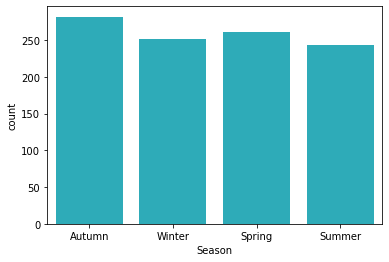

In [5]:
# create season column
# help red box
#convert date to datetime object
health_data_clean.date = pd.to_datetime(health_data_clean.date)

# pick months
# health_data_clean.date[1].month

health_data_clean.insert(1, 'Season', 'Null')

for i, row in enumerate(health_data_clean.date):
    # print('i = ', i)
    # print('row = ', row)
    # print('row month = ', row.month)
    # print('insert = ', health_data_clean.Season.iloc[i])
    health_data_clean.Season.iloc[i] = row.month
    
    if (row.month >= 12) or (row.month <= 2):
        health_data_clean.Season.iloc[i] = 'Winter'
    elif (row.month >= 3) and (row.month <= 5):
        health_data_clean.Season.iloc[i] = 'Spring'
    elif (row.month >= 6) and (row.month <= 8):
        health_data_clean.Season.iloc[i] = 'Summer' 
    else:
        health_data_clean.Season.iloc[i] = 'Autumn'

#print(i)
color = sb.color_palette()[9]
sb.countplot(health_data_clean.Season, color = color);



In [6]:
# test
health_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 1 to 1107
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1037 non-null   datetime64[ns]
 1   Season                      1037 non-null   object        
 2   Readiness Score             1037 non-null   float64       
 3   Average Resting Heart Rate  1037 non-null   float64       
 4   Respiratory Rate            1037 non-null   float64       
 5   Average HRV                 1037 non-null   float64       
 6   Deep Sleep Time             1037 non-null   float64       
 7   Recovery Index Score        1037 non-null   float64       
 8   Steps                       1037 non-null   float64       
 9   Activity Score              1037 non-null   float64       
 10  Temperature Deviation (°C)  1037 non-null   float64       
 11  Infradian Rythm (Data)      1037 non-null   object      

1036


/Users/karinwiberg/opt/anaconda3/envs/ucda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


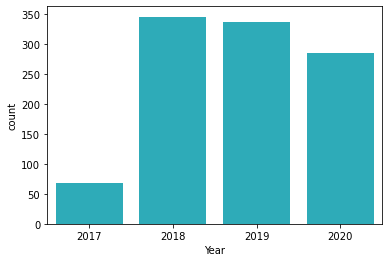

In [7]:
# create year column  
# help red box
# pick year

health_data_clean.insert(1, 'Year', 'Null')
#i_list = []

for i, row in enumerate(health_data_clean.date):
    #print('i = ', i)
    #print('row = ', row)
    # print('row month = ', row.month)
    # print('insert = ', health_data_clean.Season.iloc[i])
    health_data_clean.Year.iloc[i] = row.year

print(i)
color = sb.color_palette()[9]
sb.countplot(data = health_data_clean, x = 'Year', color = color);

In [8]:
# Test
health_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 1 to 1107
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1037 non-null   datetime64[ns]
 1   Year                        1037 non-null   object        
 2   Season                      1037 non-null   object        
 3   Readiness Score             1037 non-null   float64       
 4   Average Resting Heart Rate  1037 non-null   float64       
 5   Respiratory Rate            1037 non-null   float64       
 6   Average HRV                 1037 non-null   float64       
 7   Deep Sleep Time             1037 non-null   float64       
 8   Recovery Index Score        1037 non-null   float64       
 9   Steps                       1037 non-null   float64       
 10  Activity Score              1037 non-null   float64       
 11  Temperature Deviation (°C)  1037 non-null   float64     

In [9]:
# Test
health_data_clean.head()

,date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)
1,2017-10-07,2017,Autumn,92.0,65.125,14.000,28.0,2910.0,100.0,11562.0,94.0,-0.16,Follicular
2,2017-10-08,2017,Autumn,92.0,65.500,13.625,30.0,1950.0,100.0,6076.0,87.0,-0.02,Follicular
3,2017-10-09,2017,Autumn,75.0,70.125,14.250,27.0,1620.0,1.0,8407.0,84.0,0.12,Follicular
4,2017-10-10,2017,Autumn,91.0,64.375,13.125,29.0,2430.0,100.0,5333.0,72.0,-0.09,Follicular
6,2017-10-12,2017,Autumn,80.0,68.625,14.125,28.0,1740.0,9.0,3920.0,62.0,-0.02,Follicular


In [10]:
# convert deep sleep unit to minutes
health_data_clean['Deep Sleep Time'] = health_data_clean['Deep Sleep Time']/60

In [11]:
# Test
health_data_clean.head()

,date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)
1,2017-10-07,2017,Autumn,92.0,65.125,14.000,28.0,48.5,100.0,11562.0,94.0,-0.16,Follicular
2,2017-10-08,2017,Autumn,92.0,65.500,13.625,30.0,32.5,100.0,6076.0,87.0,-0.02,Follicular
3,2017-10-09,2017,Autumn,75.0,70.125,14.250,27.0,27.0,1.0,8407.0,84.0,0.12,Follicular
4,2017-10-10,2017,Autumn,91.0,64.375,13.125,29.0,40.5,100.0,5333.0,72.0,-0.09,Follicular
6,2017-10-12,2017,Autumn,80.0,68.625,14.125,28.0,29.0,9.0,3920.0,62.0,-0.02,Follicular


In [12]:
# estetics capitalize date column name
health_data_clean.rename(columns={"date": "Date"}, inplace = True) # help doesnt work


In [13]:
health_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 1 to 1107
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1037 non-null   datetime64[ns]
 1   Year                        1037 non-null   object        
 2   Season                      1037 non-null   object        
 3   Readiness Score             1037 non-null   float64       
 4   Average Resting Heart Rate  1037 non-null   float64       
 5   Respiratory Rate            1037 non-null   float64       
 6   Average HRV                 1037 non-null   float64       
 7   Deep Sleep Time             1037 non-null   float64       
 8   Recovery Index Score        1037 non-null   float64       
 9   Steps                       1037 non-null   float64       
 10  Activity Score              1037 non-null   float64       
 11  Temperature Deviation (°C)  1037 non-null   float64     

In [14]:
health_data_clean.to_csv('health-data-cleaned.csv', index=False)

### What is the structure of your dataset?

> The data contains 57 columns
> 1040 non null observations (3 years of data)
> Numeric data in 53 columns
> Categoric data in 4 columns
> The data is tidy and of high quality

### What is/are the main feature(s) of interest in your dataset?

> The main objective is to assess if and how overall health change with the infradian rythm, the menstrual cycle, and answer the question:
_"Would life style adaption to the infradian rythm would be benefital to overall health?"_

> Suggested response variables: Readiness Score, RHR, Respiratory Rate, HRV, Deep Sleep, Recovery Index Score

> Factors: Year, Season, Infradian Rythm Phases, Activity score, Steps, Body Temperature

> _Which varaible show the greatest impact on the response variables?_

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From my experience, I have chosen 12 variables presented in the data section to investigate further.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Numeric Univariate Exploration

In [15]:
health_data_cleaned = pd.read_csv('health-data-cleaned.csv')
health_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1037 non-null   object 
 1   Year                        1037 non-null   int64  
 2   Season                      1037 non-null   object 
 3   Readiness Score             1037 non-null   float64
 4   Average Resting Heart Rate  1037 non-null   float64
 5   Respiratory Rate            1037 non-null   float64
 6   Average HRV                 1037 non-null   float64
 7   Deep Sleep Time             1037 non-null   float64
 8   Recovery Index Score        1037 non-null   float64
 9   Steps                       1037 non-null   float64
 10  Activity Score              1037 non-null   float64
 11  Temperature Deviation (°C)  1037 non-null   float64
 12  Infradian Rythm (Data)      1037 non-null   object 
dtypes: float64(9), int64(1), object(3

In [16]:
# base color set
color = sb.color_palette()[9]
color_pal = sb.color_palette('tab10', n_colors=4)
color_pal_r = sb.color_palette('tab10', n_colors=4)

In [17]:
# Readiness Score outliers
health_data_cleaned[health_data_cleaned['Readiness Score'] == 35.0] # index 604 wedding can be excluded

# remove invalid data 12 oct 2020
health_data_cleaned = health_data_cleaned[health_data_cleaned['Readiness Score'] != 35.0]

health_data_cleaned[health_data_cleaned['Readiness Score'] == 35.0]

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)


In [18]:
# Deep Sleep outliers 
health_data_cleaned[health_data_cleaned['Deep Sleep Time'] <= 0.00] # hidden null values

# remove invalid data 12 oct 2020
health_data_cleaned = health_data_cleaned[health_data_cleaned['Deep Sleep Time'] != 0.00]

health_data_cleaned[health_data_cleaned['Deep Sleep Time'] <= 0.00]

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)


In [19]:
# Activity score outliers
health_data_cleaned[health_data_cleaned['Recovery Index Score'] <= 00.00] # hidden null values

# remove invalid data 12 oct 2020
health_data_cleaned = health_data_cleaned[health_data_cleaned['Activity Score'] != 0.00]

health_data_cleaned[health_data_cleaned['Activity Score'] <= 00.00]

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)


In [20]:
# Recovery outliers
health_data_cleaned[health_data_cleaned['Recovery Index Score'] <= 5.00] # can exclude one value where no data existing

# remove invalid data 12 oct 2020
health_data_cleaned = health_data_cleaned[health_data_cleaned['Date'] != '2017-11-14'] # no data collected 

# test
health_data_cleaned[health_data_cleaned['Recovery Index Score'] <= 5.00] 

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)
2,2017-10-09,2017,Autumn,75.0,70.125,14.250,27.0,27.0,1.0,8407.0,84.0,0.12,Follicular
8,2017-10-16,2017,Autumn,71.0,69.000,13.750,24.0,28.5,1.0,6485.0,62.0,0.12,Follicular
153,2018-04-08,2018,Spring,82.0,69.750,14.375,26.0,57.0,4.0,8014.0,78.0,0.26,Lutheal
155,2018-04-10,2018,Spring,79.0,66.500,14.000,31.0,80.0,2.0,6750.0,61.0,0.26,Lutheal
200,2018-05-26,2018,Spring,84.0,67.250,13.875,29.0,62.0,2.0,12478.0,94.0,0.05,Lutheal


In [21]:
# Temp outliers
health_data_cleaned[health_data_cleaned['Temperature Deviation (°C)'] >= 1] # > 1 sick ok to exclude? (all in Lutheal)

# remove invalid data 12 oct 2020
health_data_cleaned = health_data_cleaned[health_data_cleaned['Temperature Deviation (°C)'] <= 1]

health_data_cleaned[health_data_cleaned['Temperature Deviation (°C)'] >= 1]

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)


In [22]:
# Temp outliers - it ok no need to remove
health_data_cleaned[health_data_cleaned['Temperature Deviation (°C)'] <= -0.6] # > 1 sick ok to exclude? (all in Lutheal)

# remove invalid data 12 oct 2020
#health_data_clean = health_data_clean[health_data_clean['Temperature Deviation (°C)'] <= 1]

#health_data_clean[health_data_clean['Temperature Deviation (°C)'] >= 1]

,Date,Year,Season,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C),Infradian Rythm (Data)
963,2020-08-16,2020,Summer,69.0,64.64,14.875,32.0,9.0,69.0,16035.0,83.0,-0.72,Ovulation


In [23]:
# create sub df with numeric dtypes
health_data_cleaned_num = health_data_cleaned.select_dtypes(include = 'float64')
health_data_cleaned_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Readiness Score             1022 non-null   float64
 1   Average Resting Heart Rate  1022 non-null   float64
 2   Respiratory Rate            1022 non-null   float64
 3   Average HRV                 1022 non-null   float64
 4   Deep Sleep Time             1022 non-null   float64
 5   Recovery Index Score        1022 non-null   float64
 6   Steps                       1022 non-null   float64
 7   Activity Score              1022 non-null   float64
 8   Temperature Deviation (°C)  1022 non-null   float64
dtypes: float64(9)
memory usage: 79.8 KB


In [24]:
health_data_cleaned_num.describe()

,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C)
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,81.379648,65.022510,13.993640,30.276908,46.764188,78.245597,8127.513699,73.094912,0.006086
std,8.062239,3.939649,0.392903,5.974696,20.498589,25.342461,3860.222919,9.942528,0.230110
min,43.000000,55.430000,12.250000,15.000000,0.500000,1.000000,14.000000,42.000000,-0.720000
25%,77.000000,62.125000,13.750000,26.000000,31.500000,57.000000,5543.500000,67.000000,-0.160000
50%,83.000000,64.775000,14.000000,30.000000,45.500000,91.000000,8050.000000,73.000000,-0.020000
75%,87.000000,67.625000,14.250000,34.000000,59.000000,100.000000,10442.750000,80.000000,0.190000
max,98.000000,78.250000,15.250000,51.000000,136.000000,100.000000,24686.000000,99.000000,0.660000


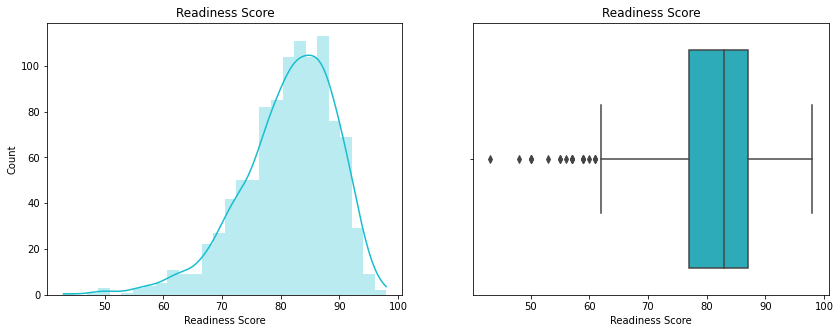

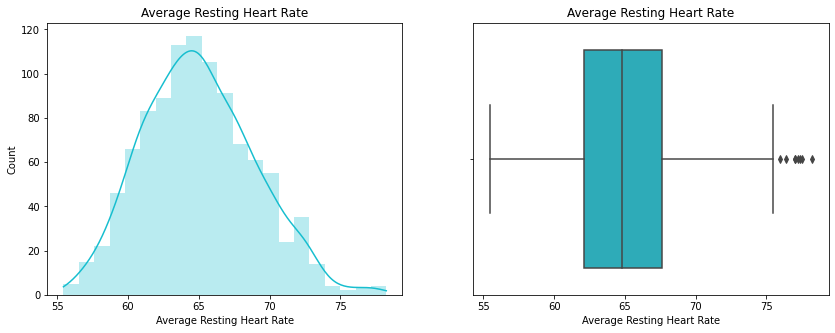

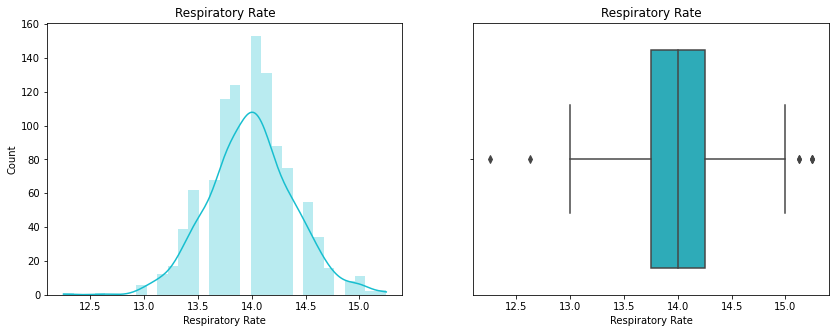

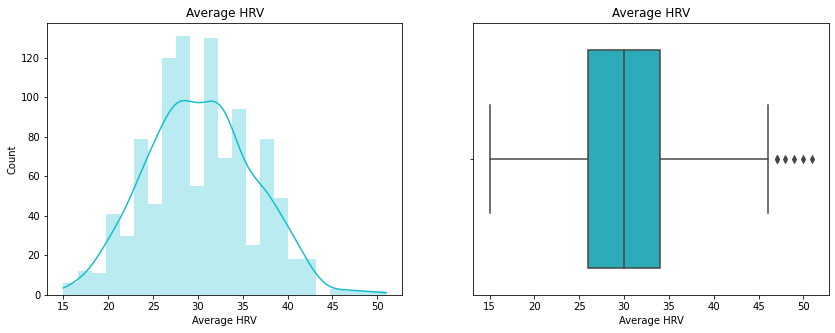

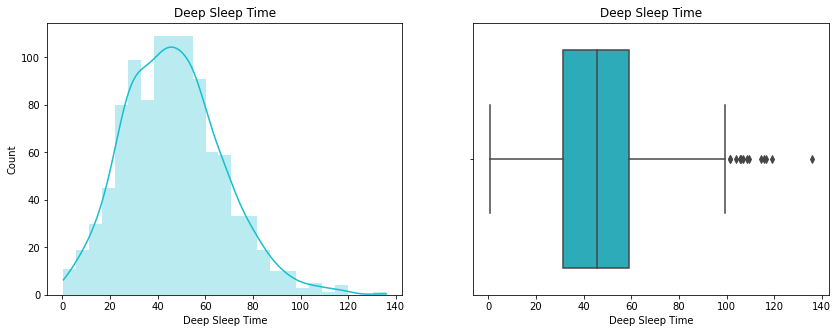

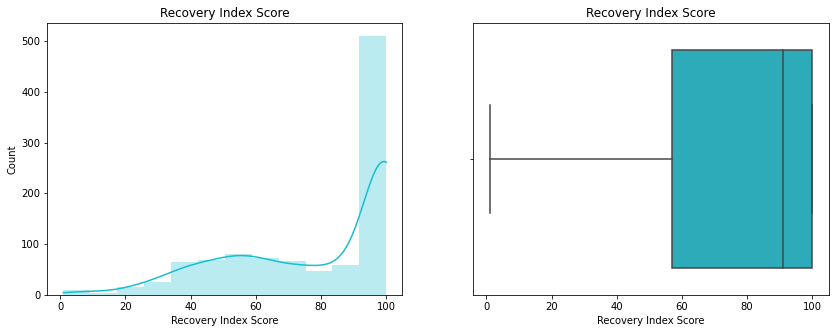

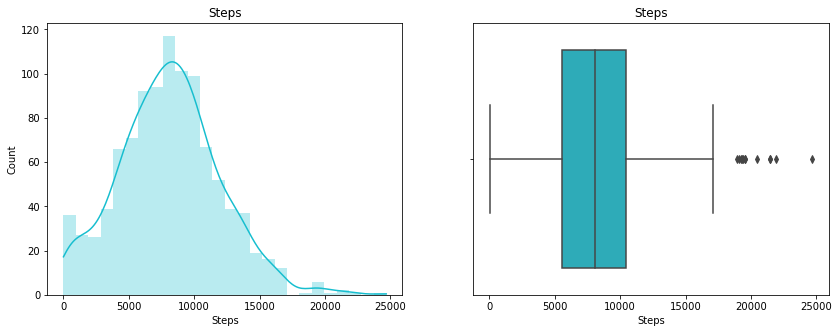

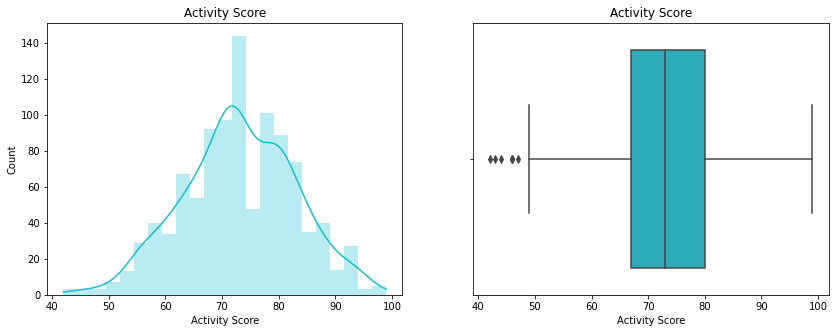

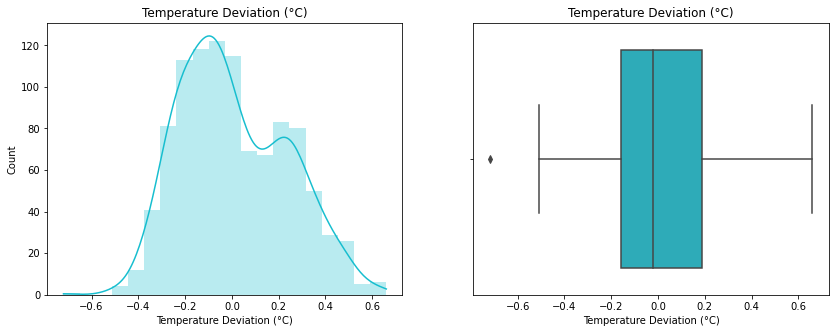

In [25]:
### Frequency Distributions

for col in health_data_cleaned_num:
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    sb.histplot(data = health_data_cleaned_num, x = col, kde = True, edgecolor = "none", alpha = 0.3, color = color)
    plt.title(col)
    
    plt.subplot(1,2,2)
    sb.boxplot(data = health_data_cleaned_num, x = col, color = color)
    plt.title(col)
    plt.show()
   
    plt.show()
    
   

In [26]:
# skewness - 
print(health_data_cleaned_num.agg(['skew']).transpose())

# interpretation
# Fairly Symmetrical -0.5 to 0.5
# Moderate Skewed -0.5 to -1.0 and 0.5 to 1.0
# Highly Skewed < -1.0 and > 1.0




                                skew
Readiness Score            -0.935046
Average Resting Heart Rate  0.320488
Respiratory Rate            0.056688
Average HRV                 0.152763
Deep Sleep Time             0.489039
Recovery Index Score       -0.823547
Steps                       0.305539
Activity Score             -0.102040
Temperature Deviation (°C)  0.359436


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Univariate findings

**Readyness Score**:
The distribution is moderate left skewed (skew -0.94). There are 10 events with low Readiness Score classified as outliers on the lower side (stressed side) by the box plot , they are so many that I won’t discard them. One outlier was removed, this score was because of low readiness score and it was because an exhausting wedding abroad, which was a one time event. Though, indicating that this person have difficulties to recover from such occasion.

**Average Resting Heart Rate**:
The distribution is fairly symmetrical (skewness 0.32).
The box plot show some outliers on the higher side of the interval (stressed side). They are also so many that I don’t want to remove them. 

**Respiratory Rate**:
The distribution is symmetrical (skewness 0.06) and shows an interesting pattern with different gaps in the histogram. Maybe it represents this bodys different states? 
The box plot find 4 outliers, 2 on each side of the distribution. I don’t have any reason to exclude them since they are within a reasonable range of respiratory rate. A log transformation is recommened.

**Average HRV**:
The distribution is fairly symmetrical (skewness 0.15).
5 outliers are detected in the box plot on the higher side of the interval (on the recovered side). 

**Deep Sleep Time**:
The distribution is fairly to moderate right skewed (skewness 0.50).
There was one outlier which revealed that no data was recorded that night, it was removed. The box plot shows quite many outliers in the high end of the interval (healthy side), they are kept in the analysis. 

**Recovery Index Score**:
The distribution does not appear to be a normal distribution or perhaps a bimodal normal distribution. This needs further investigation first in multivariate expolation, it doesnt solve the problem then we look for transformations or removal of values. One hidden null value was found, after removal no proper outliers are detected from the box plot.

**Steps**:
A fairly right skewed distribution (skewness 0.31).
There are about 10 outliers from the box plot on the high end side (very active days). 

**Activity Score**:
The distribution looks normally distributed (skewness of -0.10).
Perhaps there is a tendency to biomodality, this is recommended to investigate further. Hidden null vaules where removed. The box plot shows about 5 outliers on the low side, there are not unreasonably low though. 

**Temperature Deviation**:
The distribution is fairly right skewed (0.36) and has a bimodal shape. This has to be further investigated. 2 values where removed showing fever. After, there is one clear outlier on the low side, its not unreasonably low though.

/Users/karinwiberg/opt/anaconda3/envs/ucda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


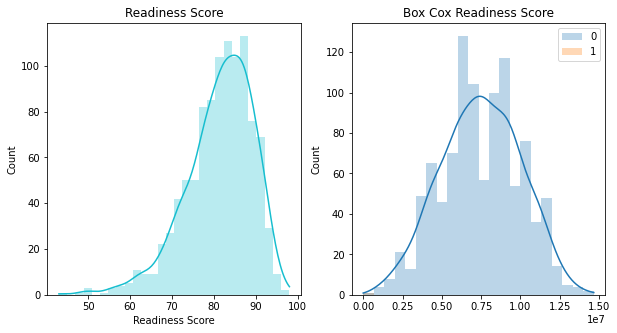

In [27]:
plt.figure(figsize = (10,5))

# original  
plt.subplot(1,2,1)
sb.histplot(data = health_data_cleaned_num, x = 'Readiness Score', kde = True, edgecolor = "none", alpha = 0.3, color = color)
plt.title('Readiness Score');

# boxcox transformation - Help warning label
from scipy import stats

plt.subplot(1,2,2)
boxcox_transformation = stats.boxcox(health_data_cleaned_num['Readiness Score'])
sb.histplot(data = boxcox_transformation, kde = True, edgecolor = "none", alpha = 0.3, color = color)
plt.title('Box Cox Readiness Score');

**Readiness Score**: The transformation results in a normally distributed curve by using the Box Cox method. Perhaps a bimodal pattern can spotted. This is recommended to be investigated further.

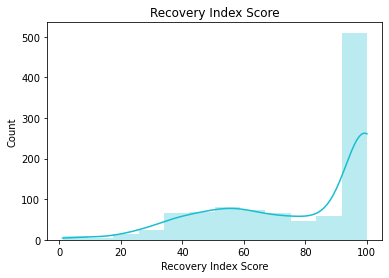

In [28]:
# original  - none of the transformations are working
sb.histplot(data = health_data_cleaned_num, x = 'Recovery Index Score', kde = True, edgecolor = "none", alpha = 0.3, color = color)
plt.title('Recovery Index Score');


**Recovery Index Score**: No successful transformation is performed. This could also be due to bimodal behaviour, which will be investigated further. 

### Categorical Univariate Exploration

In [29]:
health_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1022 non-null   object 
 1   Year                        1022 non-null   int64  
 2   Season                      1022 non-null   object 
 3   Readiness Score             1022 non-null   float64
 4   Average Resting Heart Rate  1022 non-null   float64
 5   Respiratory Rate            1022 non-null   float64
 6   Average HRV                 1022 non-null   float64
 7   Deep Sleep Time             1022 non-null   float64
 8   Recovery Index Score        1022 non-null   float64
 9   Steps                       1022 non-null   float64
 10  Activity Score              1022 non-null   float64
 11  Temperature Deviation (°C)  1022 non-null   float64
 12  Infradian Rythm (Data)      1022 non-null   object 
dtypes: float64(9), int64(1), object(3

In [30]:
# change datatype of year to object
health_data_cleaned.Year = health_data_cleaned.Year.astype('str')

In [31]:
# create sub df with categorical dtypes
health_data_cleaned_cat = health_data_cleaned.select_dtypes(include = 'object')
health_data_cleaned_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1022 non-null   object
 1   Year                    1022 non-null   object
 2   Season                  1022 non-null   object
 3   Infradian Rythm (Data)  1022 non-null   object
dtypes: object(4)
memory usage: 39.9+ KB


In [32]:
# create categorical dtypes
health_data_cleaned_cat = health_data_cleaned_cat.astype('category')



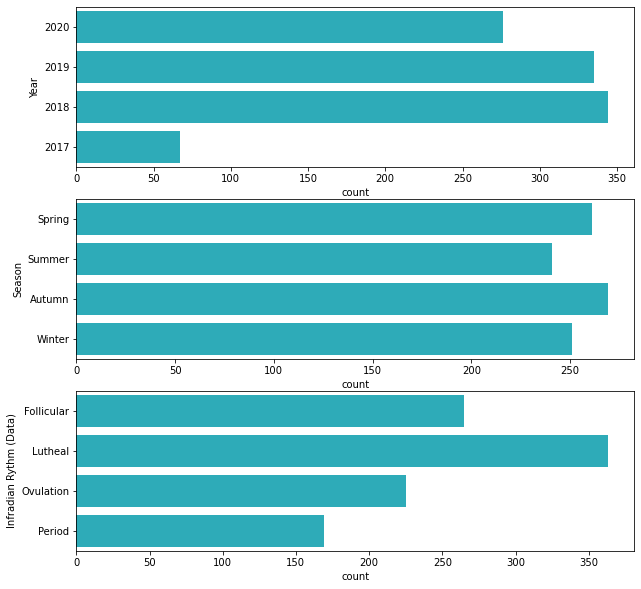

In [33]:
plt.figure(figsize = (10,10))

# Year

#plot
plt.subplot(3,1,1)

# sort categorical dtypes
order = ['2020', '2019', '2018', '2017']
sb.countplot(data = health_data_cleaned_cat, y = 'Year', order = order, color = color);

#Season
plt.subplot(3,1,2)
order = ['Spring', 'Summer', 'Autumn', 'Winter']
sb.countplot(data = health_data_cleaned_cat, y = 'Season', order = order, color = color);

# Infradian Rythm
plt.subplot(3,1,3)
order = ['Follicular', 'Ovulation', 'Lutheal', 'Period']
sb.countplot(data = health_data_cleaned_cat, y = 'Infradian Rythm (Data)', color = color);




**Year**: The data is collected during 3 years in compound time and 4 calendar years. 

**Season**: The data set contains data from all seasons in equal amounts. 

**Infradian Rythm**: The data set contains data from all phases of the menstrual cycle. There are more days of lutheal data than average data per phase and there are less data of periods than average data per phase. 

## Choise of Response Variable

In [34]:
health_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1022 non-null   object 
 1   Year                        1022 non-null   object 
 2   Season                      1022 non-null   object 
 3   Readiness Score             1022 non-null   float64
 4   Average Resting Heart Rate  1022 non-null   float64
 5   Respiratory Rate            1022 non-null   float64
 6   Average HRV                 1022 non-null   float64
 7   Deep Sleep Time             1022 non-null   float64
 8   Recovery Index Score        1022 non-null   float64
 9   Steps                       1022 non-null   float64
 10  Activity Score              1022 non-null   float64
 11  Temperature Deviation (°C)  1022 non-null   float64
 12  Infradian Rythm (Data)      1022 non-null   object 
dtypes: float64(9), object(4)
memory u

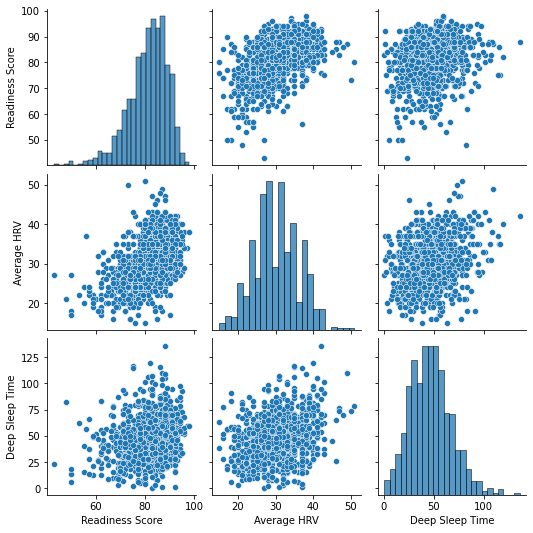

In [35]:
### Determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
# From 3D multivariate analysis 'Average HRV' and 'Average Respiratory Rate' shows the greatest impact of 
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time']]
sb.pairplot(candidates);


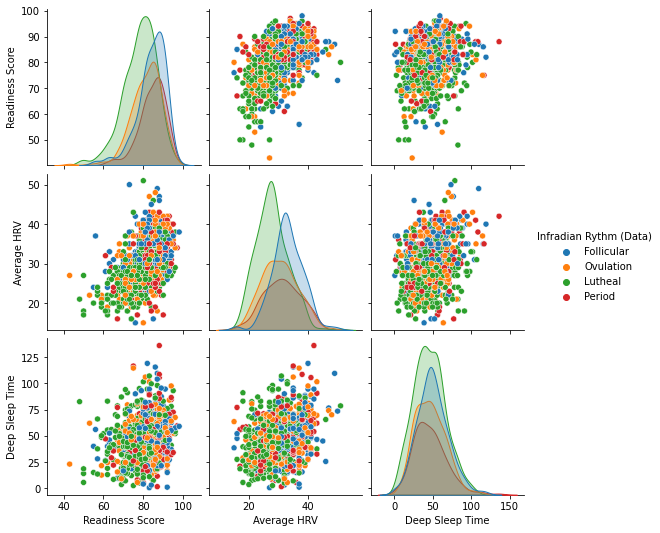

In [36]:
# multivariate determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time', 'Infradian Rythm (Data)']]
sb.pairplot(candidates, hue = 'Infradian Rythm (Data)', palette = color_pal_r);



In [37]:
response_var = health_data_cleaned['Average HRV']

### Choise of Response Variable
In professional cases, I would ask the physiological expert for support in determination of response variabel. This time, a quick analysis was made to detemine any potentional response.

Of the suggested response variables (Readiness Score, RHR, Respiratory Rate, HRV, Deep Sleep, Recovery Index Score)  

From the uni- and bivariate plots following parameters were excluded:
- 'Recovery Index Score' is not normally distributed
- 'Average HRV' and 'Average Resting Heart Rate' show clear correlation. Therefore, one is enough, 'Average Resting Heart Rate' is excluded.
- 'Respiratory Rate' is not believed to be the major focus of this analysis

Of the three remaining **Average HRV** was chosen because of the multivariate plots revealing patterns of the menstrual cycle.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [38]:
health_data_cleaned_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Readiness Score             1022 non-null   float64
 1   Average Resting Heart Rate  1022 non-null   float64
 2   Respiratory Rate            1022 non-null   float64
 3   Average HRV                 1022 non-null   float64
 4   Deep Sleep Time             1022 non-null   float64
 5   Recovery Index Score        1022 non-null   float64
 6   Steps                       1022 non-null   float64
 7   Activity Score              1022 non-null   float64
 8   Temperature Deviation (°C)  1022 non-null   float64
dtypes: float64(9)
memory usage: 119.8 KB


In [39]:
health_data_cleaned_var = health_data_cleaned_num[health_data_cleaned_num.columns[health_data_cleaned_num.columns != 'Average HRV']]


In [40]:
health_data_cleaned_num.describe().round(2)

,Readiness Score,Average Resting Heart Rate,Respiratory Rate,Average HRV,Deep Sleep Time,Recovery Index Score,Steps,Activity Score,Temperature Deviation (°C)
count,1022.00,1022.00,1022.00,1022.00,1022.00,1022.00,1022.00,1022.00,1022.00
mean,81.38,65.02,13.99,30.28,46.76,78.25,8127.51,73.09,0.01
std,8.06,3.94,0.39,5.97,20.50,25.34,3860.22,9.94,0.23
min,43.00,55.43,12.25,15.00,0.50,1.00,14.00,42.00,-0.72
25%,77.00,62.12,13.75,26.00,31.50,57.00,5543.50,67.00,-0.16
50%,83.00,64.78,14.00,30.00,45.50,91.00,8050.00,73.00,-0.02
75%,87.00,67.62,14.25,34.00,59.00,100.00,10442.75,80.00,0.19
max,98.00,78.25,15.25,51.00,136.00,100.00,24686.00,99.00,0.66


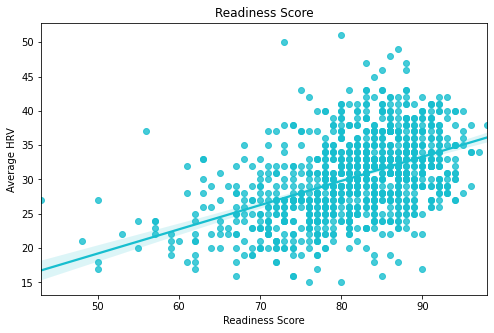

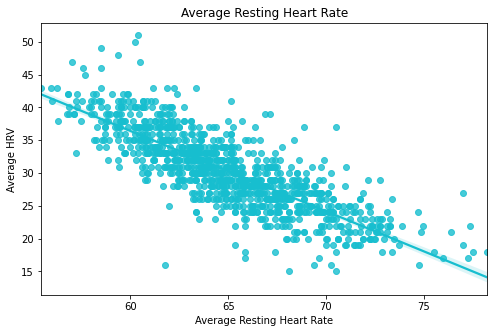

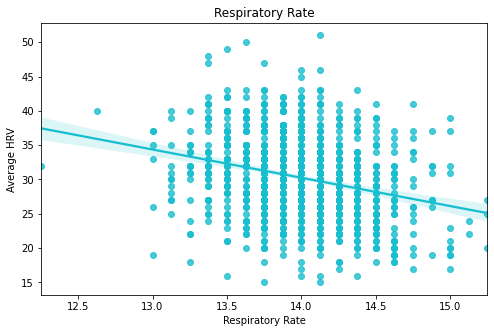

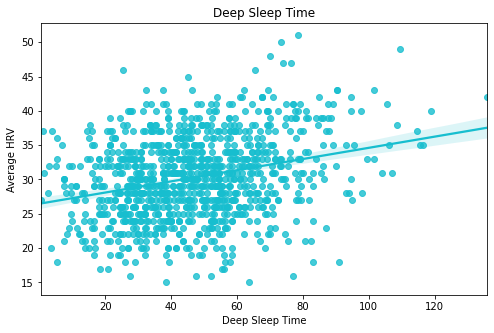

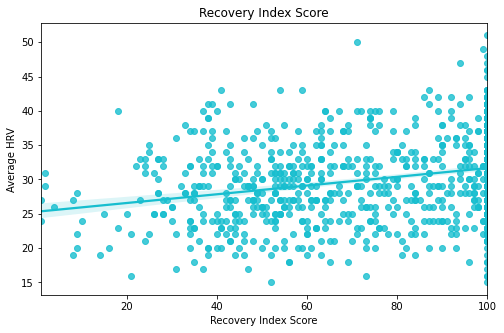

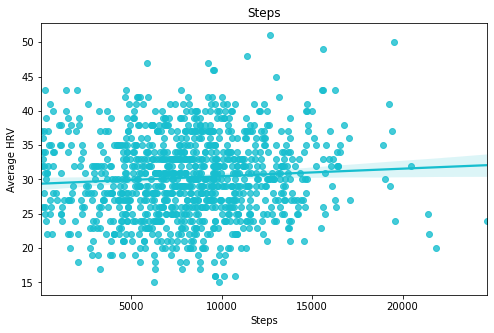

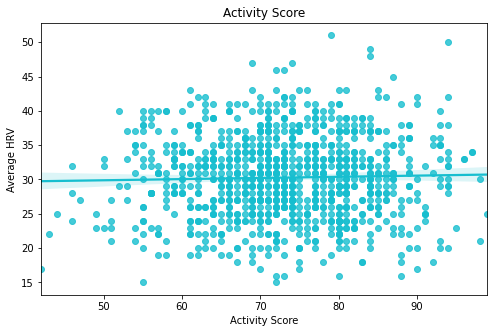

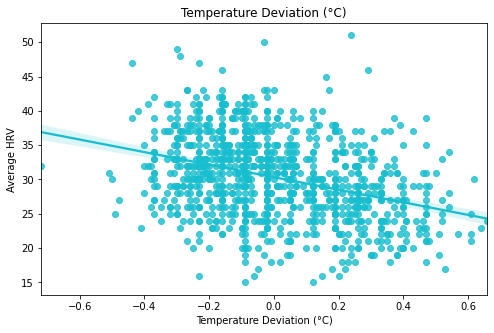

In [41]:
# numeric bivariate plots

for col in health_data_cleaned_var:
    plt.figure(figsize = (8,5))
    sb.regplot(data = health_data_cleaned_num, x = col, y = 'Average HRV', color = color)
    plt.title(col)
    

### Bivariate Numeric Results
_Positive Correlation_
- **Readiness Score** shows a high and wide positive correlation to Average HRV, tendency to exponential relationship. (approx. 17 - 37 = 20)
- **Deep Sleep Time** shows a wide and positive correlation to Average HRV. (approx. 26 - 37 = 11)
- **Recovery Index** shows a wide, slightly positive relationship to Average HRV. (approx. 25 - 32 = 7)
- **Steps** show a slight but surprisingly low positive correlation to Average HRV. (approx. 29 - 31 = 2)

_Negative Correlation_
- **Average Resting Heart Rate** shows a narrow negative linear correlation with Average HRV, a slight tendency to logarithmic relationship might be spotted but over all its a good fit to the linearity. (approx. 14 - 42 = 28)
- **Respiratory Rate** shows a wide, slightly negative correlation to Average HRV. (approx. 37 - 27 = 10)
- **Temperature Deviation (°C)** shows a wide but negative correlation to Average HRV.  (approx. 25 - 37 = 12)
No correlation
- **Activity Score** show surprisingly no correlation with Average HRV. (approx. 0)


In [42]:
health_data_cleaned_cat.insert(0, 'Average HRV', health_data_cleaned['Average HRV'])
health_data_cleaned_cat.info()                    
                             
                             

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1036
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Average HRV             1022 non-null   float64 
 1   Date                    1022 non-null   category
 2   Year                    1022 non-null   category
 3   Season                  1022 non-null   category
 4   Infradian Rythm (Data)  1022 non-null   category
dtypes: category(4), float64(1)
memory usage: 109.5 KB


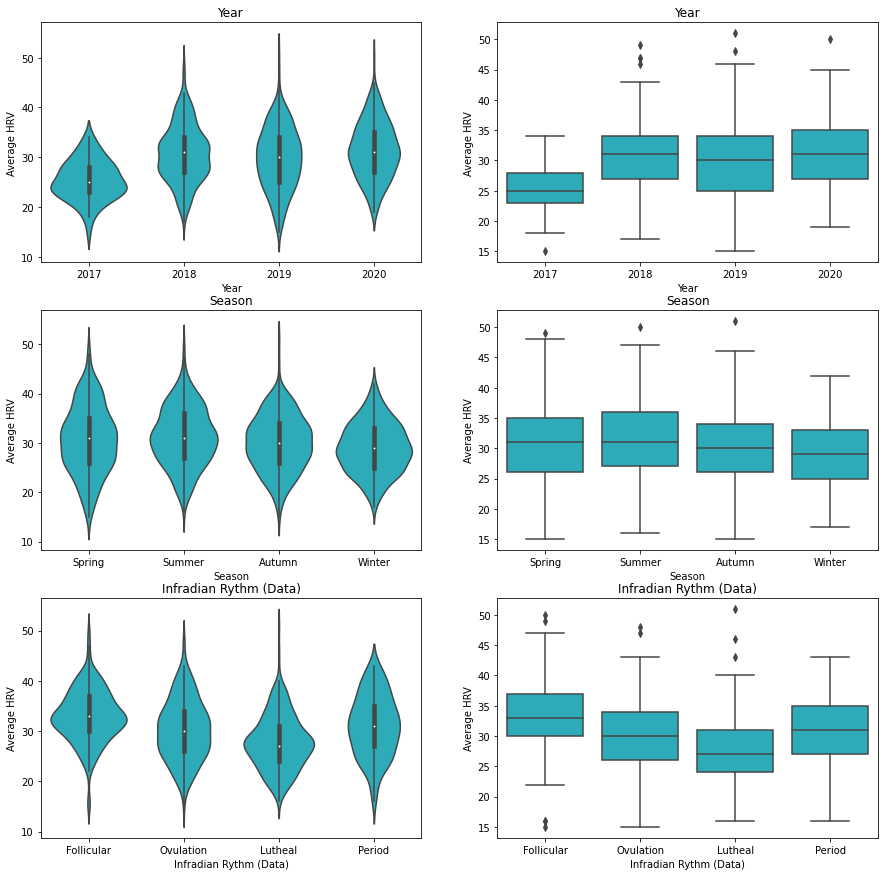

In [43]:
# categoric bivariate plots
plt.figure(figsize = (15,15))

# year
plt.subplot(3,2,1)
sb.violinplot(data = health_data_cleaned_cat, x = 'Year', y = 'Average HRV', color = color);
plt.title('Year')
plt.subplot(3,2,2)
sb.boxplot(data = health_data_cleaned_cat, x = 'Year', y = 'Average HRV', color = color);
plt.title('Year')

# season
order = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.subplot(3,2,3)
sb.violinplot(data = health_data_cleaned_cat, x = 'Season', y = 'Average HRV', order = order, color = color);
plt.title('Season')
plt.subplot(3,2,4)
sb.boxplot(data = health_data_cleaned_cat, x = 'Season', y = 'Average HRV', order = order, color = color);
plt.title('Season')

# cycle
order = ['Follicular', 'Ovulation', 'Lutheal', 'Period']
plt.subplot(3,2,5)
sb.violinplot(data = health_data_cleaned_cat, x = 'Infradian Rythm (Data)', y = 'Average HRV', order = order, color = color);
plt.title('Infradian Rythm (Data)')
plt.subplot(3,2,6)
sb.boxplot(data = health_data_cleaned_cat, x = 'Infradian Rythm (Data)', y = 'Average HRV', order = order, color = color);
plt.title('Infradian Rythm (Data)');

### Bivariate Categorical Results

None of the categoric variables show significant difference in Average HRV. However, patterns in the violin and box plots can still be found in the data. 

**Year**:
No statistical difference is found (25 - 30).
- For this person, 2017 was a worse year health wise than 2018, 2019 and 2020. 
- 2019 reveals large variation in both the reliving and stress direction.

**Season**:
No statistical difference is found.
- The average values are quite equal for all seasons.
- The variation however differ; spring, summer and autumn have all higher variation in the Average HRV than the winter season.

**Infradian Rythm Phase**:
No statistical difference is found, however patterns can be found in the data (27 - 33).
- The follicular phase shows (insignificant) highest Average HRV
- The lutheal phase shows (insignificant) lowest Average HRV 
These findings are very consistent with the experience of these phases.


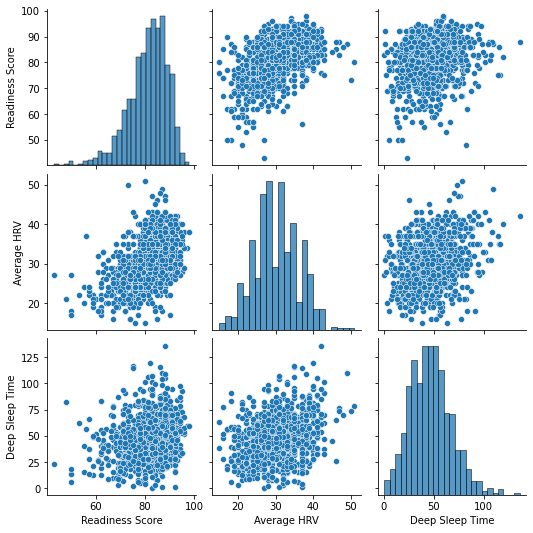

In [44]:
### Additional exploration
# HERE
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time']]
sb.pairplot(candidates);

### Bivariate Summary
The maximum effect on HRV seem to correlate most with:
1. **Average Resting Heart Rate** (28)
2. **Readiness Score** (20)
3. **Temperature Deviation (°C)**
4. **Deep Sleep Score**
5. **Respiratory Rate**

Surprisingly, number of steps or activity score did not seem to correlate with Average HRV at all. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

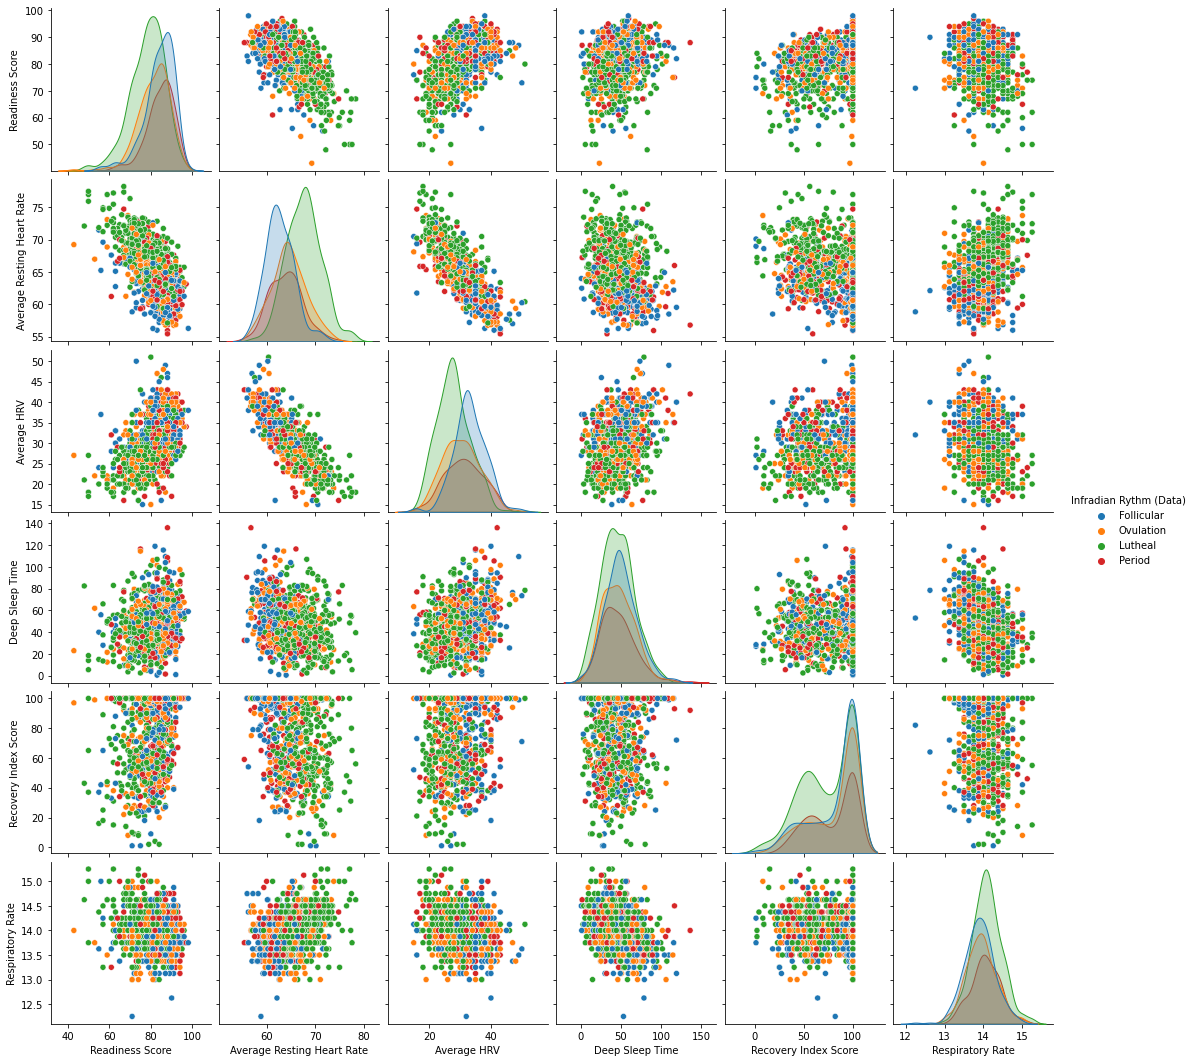

In [45]:
### Determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
candidates = health_data_cleaned[['Readiness Score', 'Average Resting Heart Rate', 'Average HRV', 'Deep Sleep Time', 'Recovery Index Score', 'Respiratory Rate', 'Infradian Rythm (Data)']]
sb.pairplot(candidates, hue = 'Infradian Rythm (Data)', palette = color_pal_r);


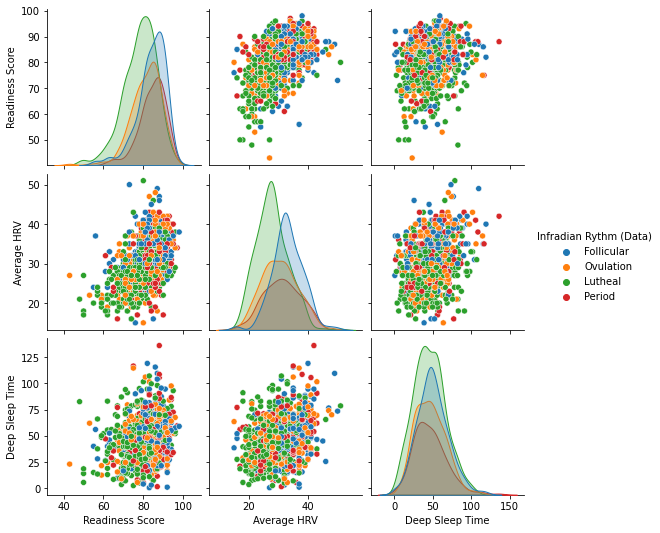

In [46]:
### Determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time', 'Infradian Rythm (Data)']]
sb.pairplot(candidates, hue = 'Infradian Rythm (Data)', palette = color_pal_r);


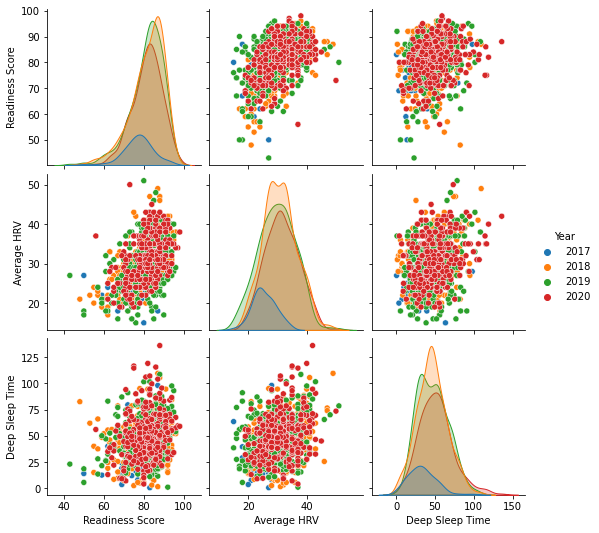

In [47]:
### Determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time', 'Year']]
sb.pairplot(candidates, hue = 'Year', palette = color_pal);


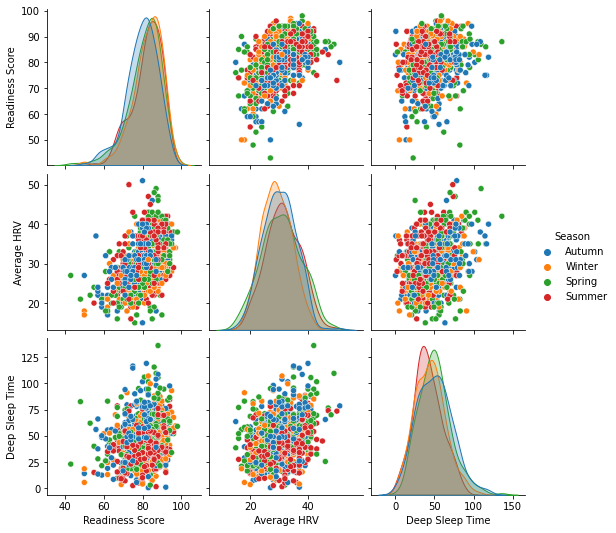

In [48]:
### Determination of key response variable
# 'Recovery Index Score' # Is not normally distributed
# 'Average HRV' and 'Average Resting Heart Rate' show clear correlation, so one is enough
# 'Respiratory Rate' is not believed to be the major focus of this analysis
candidates = health_data_cleaned[['Readiness Score', 'Average HRV', 'Deep Sleep Time', 'Season']]
sb.pairplot(candidates, hue = 'Season');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!